## Описание Проекта

**Данные**

Исторические данные о продажах игр (за 2016 г.), оценки пользователей и экспертов, жанры и платформы. 

**Задача**

* Подготовить данные;
* Провести исследовательский анализ данных с целью выявить закономерности, определяющие успешность игры;
* Составить портрет пользователя каждого региона;
* Проверить гипотезы:
  * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  * Средние пользовательские рейтинги жанров Action и Sports разные.



## Импортированные Модули

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Открыть файл

In [3]:
# data = pd.read_csv('/datasets/games.csv')
data = pd.read_csv("C:/Users/kbolo/Documents/Python Scripts/Yandex/Project 04 - Игры/games.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


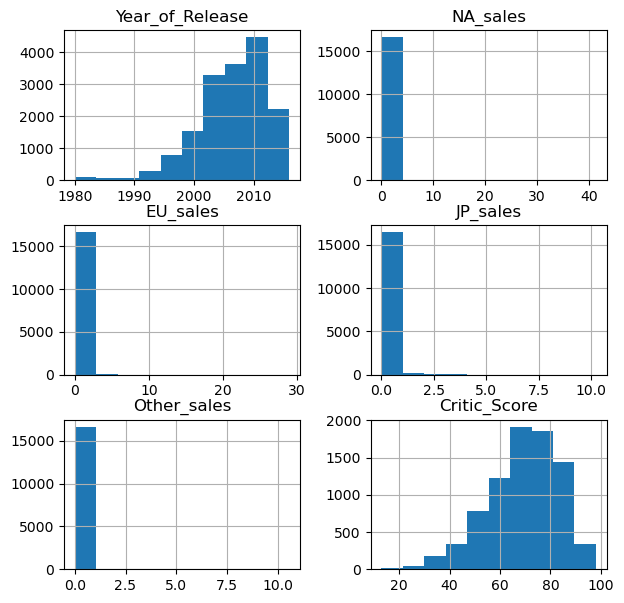

In [7]:
data.hist(figsize=(7,7))
plt.show()

---
Порядка 8 тысяч пропусков в последних 3-х столбцах с оценками и рейтингом.

Тип данных User_score -- Object.  
Наверное вместе с числовыми, присутствует и текстовые значения.

## Предобработка данных

### Названия столбцов к нижнему регистру

In [8]:
data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Столбец "name"

#### Пропуски

In [9]:
# строки с пропусками
data.loc[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих строках отсутствует не только имя, но и жанр и все рейтинги, поэтому их удаляю.

In [10]:
data = data.dropna(subset=['name'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Пробелы в имени игры

В названиях игр присутствуют пробелы в начале и возможно в конце (см. ниже)

In [11]:
print(data.name.sort_values().unique())
print()
print('Кол-во уникальных имен =',len(data.name.sort_values().unique()))

[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!']

Кол-во уникальных имен = 11559


Удаляю пробелы

In [12]:
data.name = data.name.str.strip()

In [13]:
print(data.name.sort_values().unique())
print()
print('Кол-во уникальных имен =',len(data.name.sort_values().unique()))

["'98 Koshien" '.hack//G.U. Vol.1//Rebirth' '.hack//G.U. Vol.2//Reminisce'
 ... 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!']

Кол-во уникальных имен = 11559


### Столбец "platform"

Все в порядке 

In [14]:
data.platform.sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Проверка на скрытые дубликаты:

DC это не DS
Проверил пару игр, где указана DC. Википедия говорит они выходили на платформе DreamCast

GB и GBA - разные платформы
> Game Boy  VS Game Boy Advance 

Wii u WiiU тоже различные платформы
> The Wii U comes built-in with a much powerful 1.243GHz Triple-core PowerPC-based Espresso microprocessor. The Wii, on the other hand, was a 729MHz single core device with a Broadway microprocessor.

### Столбец "year"

In [15]:
data.year_of_release.sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Явно ошибочных значений нет.  

In [16]:
print('Количество пропусков =',len(data.query('year_of_release.isna()')))

Количество пропусков = 269


In [18]:
# Заменить пропуски нечем. Строки удаляю, т.к. не скажется на дальнейшем анализе

data = data.dropna(subset=['year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Столбец "genre"

In [19]:
data.genre.sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Явно ошибочных значений нет.\
Сомнение вызывал жанр *Platform*, но Википедия пишет, что это: 
> A platformer, or platform video game, is one that traditionally features two-dimensional graphics in which players control characters who jump or climb between different platforms on the screen. It's a subgenre of the Action category, which is one of the many different types of video games.

### Столбцы с цифрами продаж

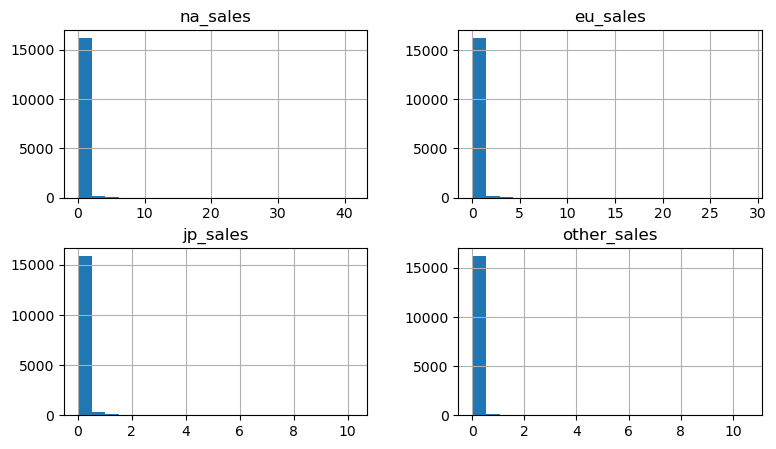

In [21]:
ax = data.hist(['na_sales','eu_sales', 'jp_sales', 'other_sales'], 
               bins=20, figsize=(9,5))

In [22]:
# Вывожу Outliers для продаж в Америке

data.query('na_sales > 8')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В списке игры с высоким уровнем продаж как в Америке, так и на остальных рынках.\
В списке присутствует очень популярный шутер *Call of Duty* \
Не считаю целесообразным удалять эти строки

### Столбец "critic_score"

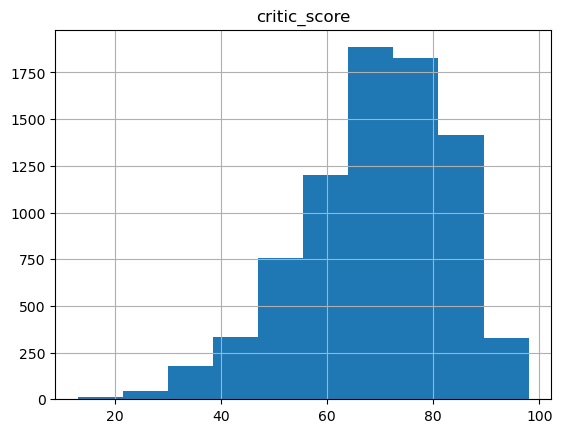

In [23]:
ax = data.hist('critic_score', bins=10)

In [24]:
# Количество пропусков в столбце
len(data.query('critic_score.isna()'))

8461

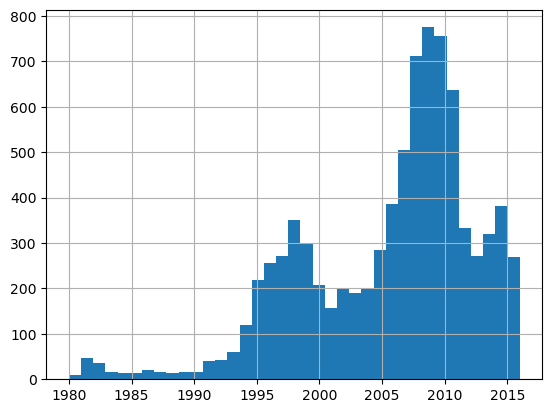

In [25]:
# Привязки пропусков к году выпуска нет
ax = data.query('critic_score.isna()').year_of_release.hist(bins=len(data.year_of_release.unique()))

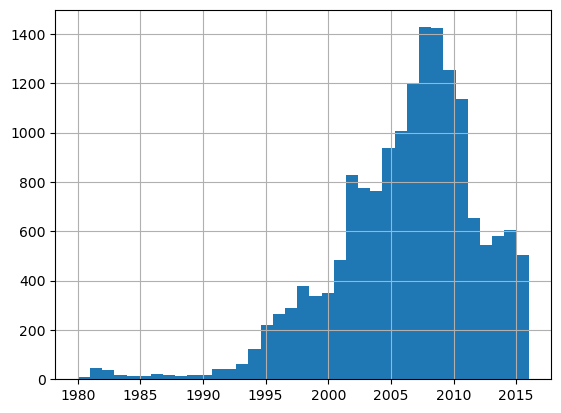

In [26]:
# Рост числа пропусков со временем объясняется ростом кол-ва игр
ax = data.year_of_release.hist(bins=len(data.year_of_release.unique()))

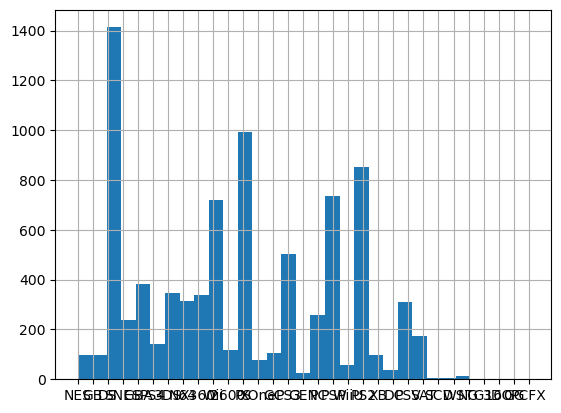

In [29]:
# Привязки пропусков к платформе нет
ax = data.query('critic_score.isna()').platform.hist(bins=len(data.platform.unique()))

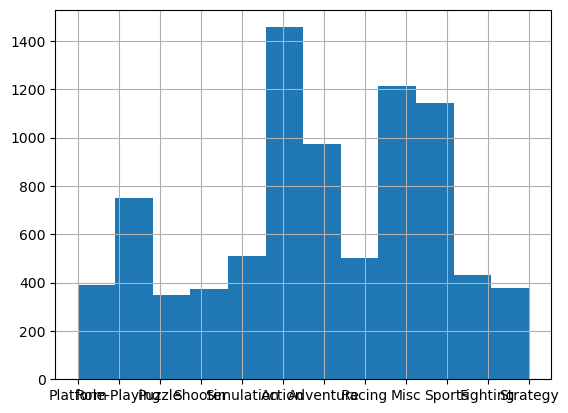

In [30]:
# Привязки пропусков к жанру нет
ax = data.query('critic_score.isna()').genre.hist(bins=len(data.genre.unique()))

Оставляю пропуски как есть.\
Оценка критиков - индивидуальное значение.\
Не корректно использовать усредненную или медианную оценку в качестве замены пропуска.

### Столбец "user_score"

In [31]:
# Уникальные значения
data.user_score.sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [32]:
# Количество строк со значением "tbd"
len(data.query('user_score == "tbd"'))

2376

Ищу в Интернете, что это может значить.

Сайт https://www.metacritic.com/faq

> WHAT DOES "TBD" MEAN?
To Be Determined.
To help ensure that METASCORES accurately reflect the reviews given by critics for any particular movie, game, television show or album, we do not display a METASCORE for those items that do not have at least four (4) reviews in our database. Once this minimum number of reviews is reached, the METASCORE will display.

Т.е. TBD ставится тогда, когда кол-во оценок недостаточно.

In [33]:
# Удаляю TBD и привожу к Float

data.user_score = pd.to_numeric(data.user_score, errors='coerce')

# Проверка
data.user_score.sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

### Столбец "rating"

In [34]:
# Уникальные значения
data.rating.sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [35]:
# Количество пропусков
len(data.query('rating.isna()'))

6676

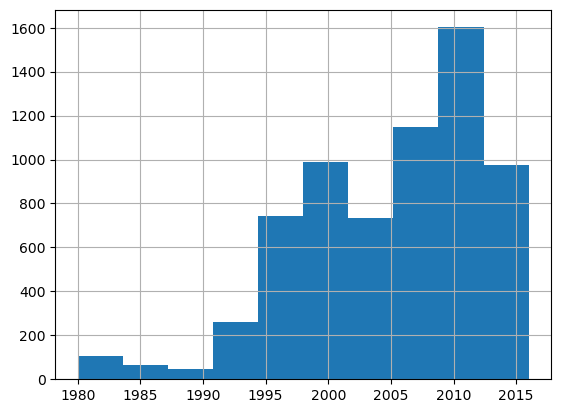

In [36]:
# Проверяю гипотезу, что пропуски свзязаны с ранним годом выхода игры.
# ESRB основана в 1994 г.

ax = data.query('rating.isna()').year_of_release.hist()

In [37]:
# Предположение не подтвердилось. Пропуски заменяю заглушкой - n/a

data.rating.fillna('n/a', inplace=True)

data.rating.sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'n/a'],
      dtype=object)

### Столбец с общими продажами

In [38]:
# Добавляю столбец сразу после столбцов с продажами по регионам
data.insert(loc= 8, column= 'total_sales',
          value= data.iloc[:,4:8].sum(axis= 1))

In [39]:
# Проверка
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,n/a
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,n/a


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

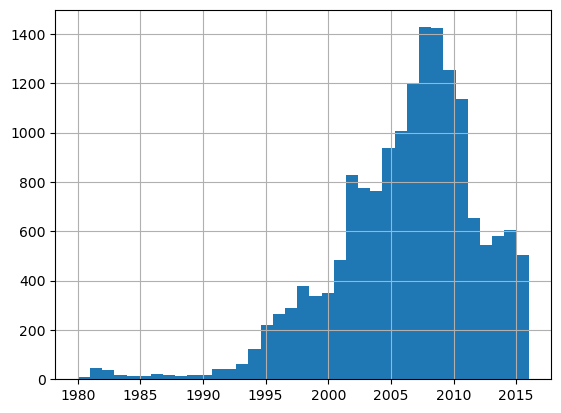

In [40]:
ax = data.year_of_release.hist(bins = 2016-1980+1)

**Вопрос:** \
Важны ли данные за все периоды?\
**Ответ:** \
Думаю данными до 1994 года можно пренебречь ввиду их малочисленности.

### Как менялись продажи по платформам

**Задание:** \
Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. 

In [41]:
top_platforms = data.groupby('platform').total_sales.sum().nlargest(10)
top_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Строю распределения по шести платформам из топа

In [42]:
top_platforms.index[:6]

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

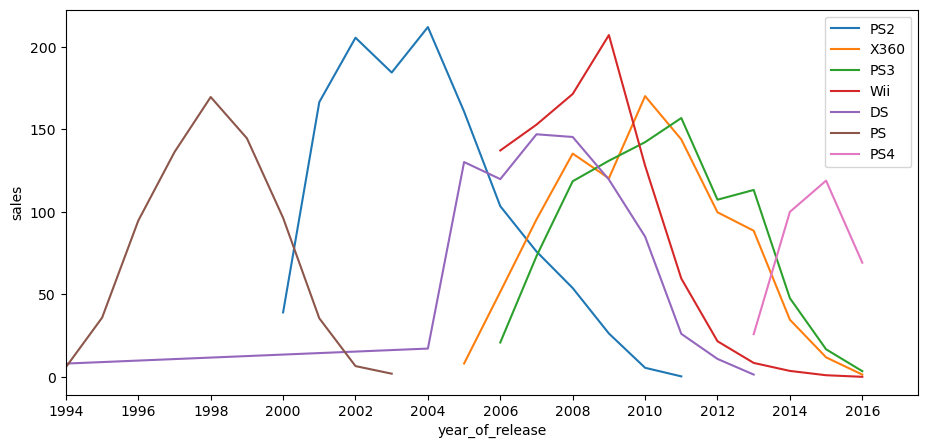

In [43]:
fig = plt.figure(figsize=(11,5))

for i in top_platforms.index[:7]:
    data.query('platform == @i').groupby('year_of_release').total_sales.sum().plot(label=i)

plt.xlim(1994)
plt.xticks(ticks=range(1994,2017,2))
plt.ylabel('sales')
plt.legend()
plt.show()

**Вопрос:** \
За какой характерный срок появляются новые и исчезают старые платформы?\
**Ответ:** \
Срок жизни платформы порядка 7 лет

### Актуальный период для анализа

Для анализа имеет смысл брать период не больше срока жизни платформы.  

Беру 6 лет: 2011-2016

In [44]:
# Удаляю ненужные для анализа данные
data = data.query('2011 <= year_of_release <= 2016')
data = data.reset_index(drop=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   float64
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   total_sales      4022 non-null   float64
 9   critic_score     1812 non-null   float64
 10  user_score       2032 non-null   float64
 11  rating           4022 non-null   object 
dtypes: float64(8), object(4)
memory usage: 377.2+ KB


In [46]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,14.73,88.0,3.4,M
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,n/a
4,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,n/a


### Потенциально прибыльные платформы

In [47]:
# Сводная таблица с продажами по годам по каждой платформе

data.pivot_table(index='year_of_release', 
                 columns='platform', 
                 values='total_sales', aggfunc=sum)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011.0,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012.0,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Убираю из дальнейшего рассмотрения из-за отсутствия данных или низких продаж
- DC;
- PS2;
- PSP;
- Wii

In [48]:
data = data.query('platform != ["DS","PS2","PSP","Wii"]')

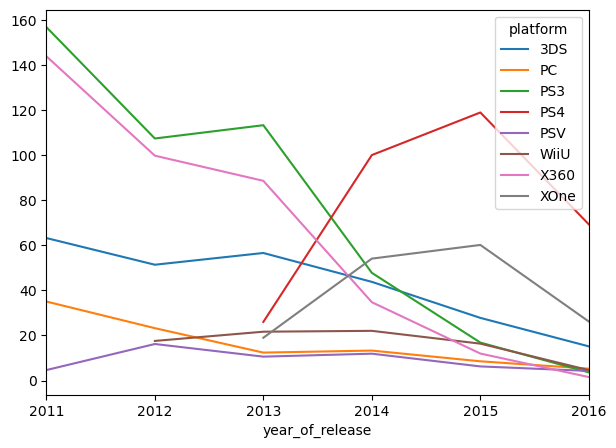

In [49]:
# Сводная таблица с продажами по годам по каждой платформе

(data.pivot_table(index='year_of_release', 
                columns='platform', 
                values='total_sales', aggfunc=sum).plot(figsize=(7,5)))
plt.xlim(2011,2016)
plt.show()

Потенциально прибыльные платформы:

1. PS4
2. XOne

Показали рост продаж с 2013 по 2015.  
Остальные платформы продемонстрировали спад.

За 2016 год все платформы демонстрируют спад.  
Причина:  
Не достаточно времени для игры 2016 года выпуска показать продажи в 2016 году.  
Неполные данные за 2016.

### График «ящик с усами»

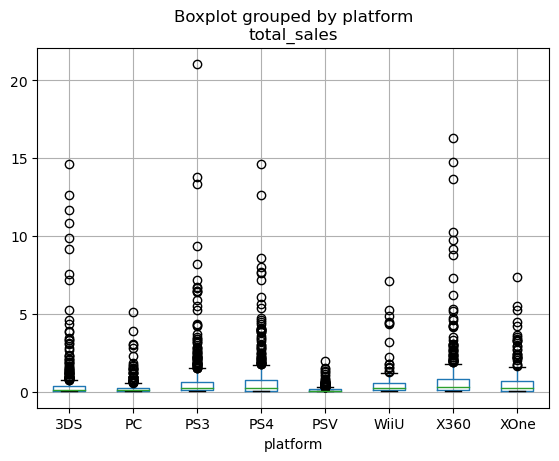

In [51]:
data.boxplot('total_sales',by='platform')
plt.show()

Плохо видно "ящики" из-за аутлайеров.  

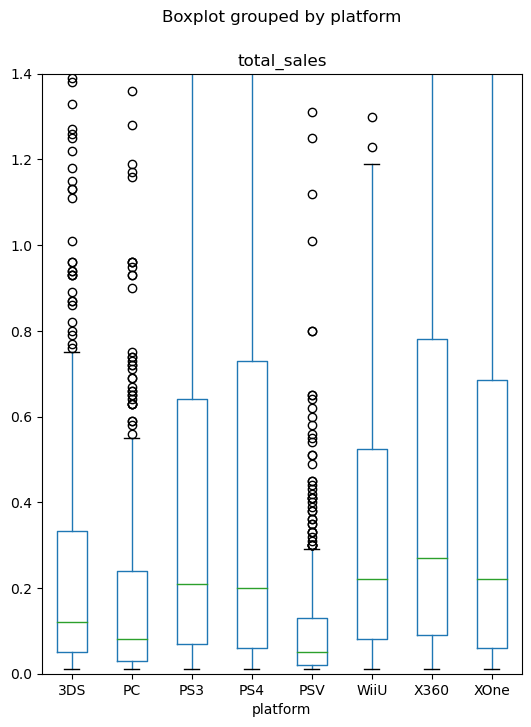

In [56]:
data.boxplot('total_sales',by='platform', figsize=(6,8), grid=False)
plt.ylim(0, 1.4)
plt.show()

Все распределения имеют сильную положительную скошенность.  
Для анализа продаж лучше использовать медианное значение.  
Медианное значение X360 самое высокое.

### Влияние отзывов на продажи

**Платформа PS4, как популярная**

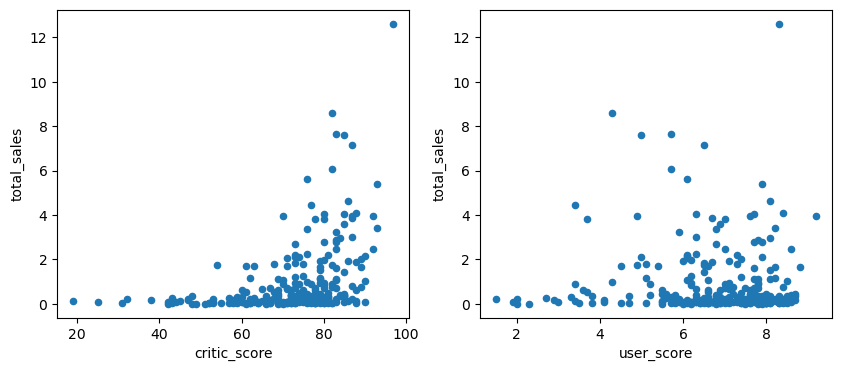

Коэффициент корреляции 
------------------------------
Оценка критиков = 0.40656790206178123
Оценка пользователей = -0.03195711020455644


In [57]:
data_score = data.loc[data.platform == 'PS4']

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,4)
data_score.plot.scatter('critic_score','total_sales', ax=axes[0])
data_score.plot.scatter('user_score','total_sales',ax=axes[1])

plt.show()

print('Коэффициент корреляции \n','-'*30, sep="")
print('Оценка критиков =', data_score.critic_score.corr(data_score.total_sales))
print('Оценка пользователей =', data_score.user_score.corr(data_score.total_sales))

Слабая положительная корреляция для оценки критиков.  
Корреляция отсутствует для оценки пользователей.

**Платформа X360, демонстрирующая большое падение продаж**

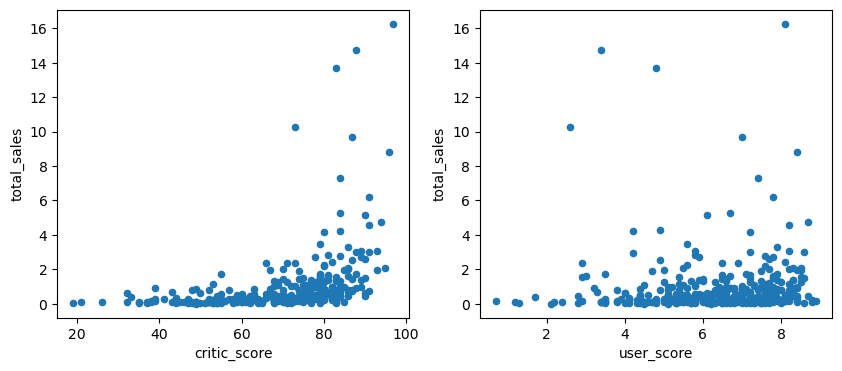

Коэффициент корреляции 
------------------------------
Оценка критиков = 0.39125332454845557
Оценка пользователей = 0.038918170729102614


In [58]:
data_score = data.loc[data.platform == 'X360']

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,4)
data_score.plot.scatter('critic_score','total_sales', ax=axes[0])
data_score.plot.scatter('user_score','total_sales',ax=axes[1])

plt.show()

print('Коэффициент корреляции \n','-'*30, sep="")
print('Оценка критиков =', data_score.critic_score.corr(data_score.total_sales))
print('Оценка пользователей =', data_score.user_score.corr(data_score.total_sales))

+/- таже картина:  
Слабая положительная корреляция для оценки критиков.  
Корреляция отсутствует для оценки пользователей.

Вывод:  
Лучше ориентироваться на отзывы критиков при анализе потенциальной прибыльности продукта

### Распределение прибыльности по жанрам

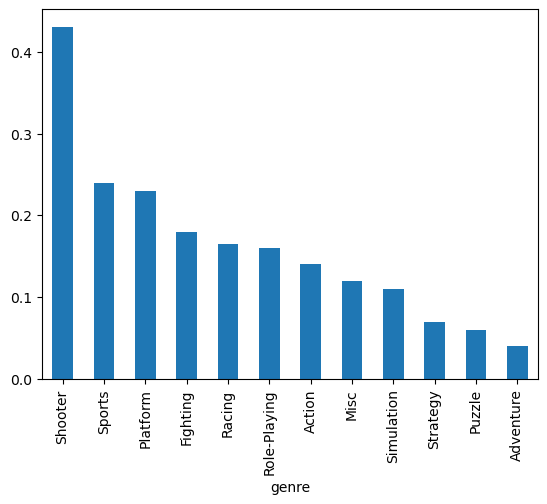

In [60]:
ax = data.groupby('genre').total_sales.median().sort_values(ascending=False).plot.bar()

Стрелялки в топе.  
2 и 3 места делят платформеры и спорт.

## Портрет пользователя

### Самые популярные жанры (топ-5)

Сначала сделаю общую картинку

In [61]:
# Группировка продаж в регионах по жанрам
df1 = data.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
df1

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,211.66,187.45,56.44,60.84
Adventure,14.02,13.46,7.61,4.14
Fighting,30.73,15.79,10.64,6.42
Misc,43.97,24.16,11.97,8.21
Platform,35.00,28.09,10.93,7.72
Puzzle,2.03,3.00,2.11,0.53
Racing,29.90,39.58,5.60,9.81
Role-Playing,79.38,60.12,65.13,19.03
Shooter,193.27,147.74,11.92,48.41


Нормализую данные, деля каждое значение в столбце на сумму столбца.  
Т.е. перевожу в % от общих продаж в регионе.  

In [62]:
df1 = df1.div(df1.sum())
df1.head()

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,0.278493,0.297989,0.275977,0.308332
Adventure,0.018447,0.021397,0.037211,0.020981
Fighting,0.040433,0.025101,0.052027,0.032536
Misc,0.057854,0.038407,0.058530,0.041608
Platform,0.046051,0.044655,0.053445,0.039124


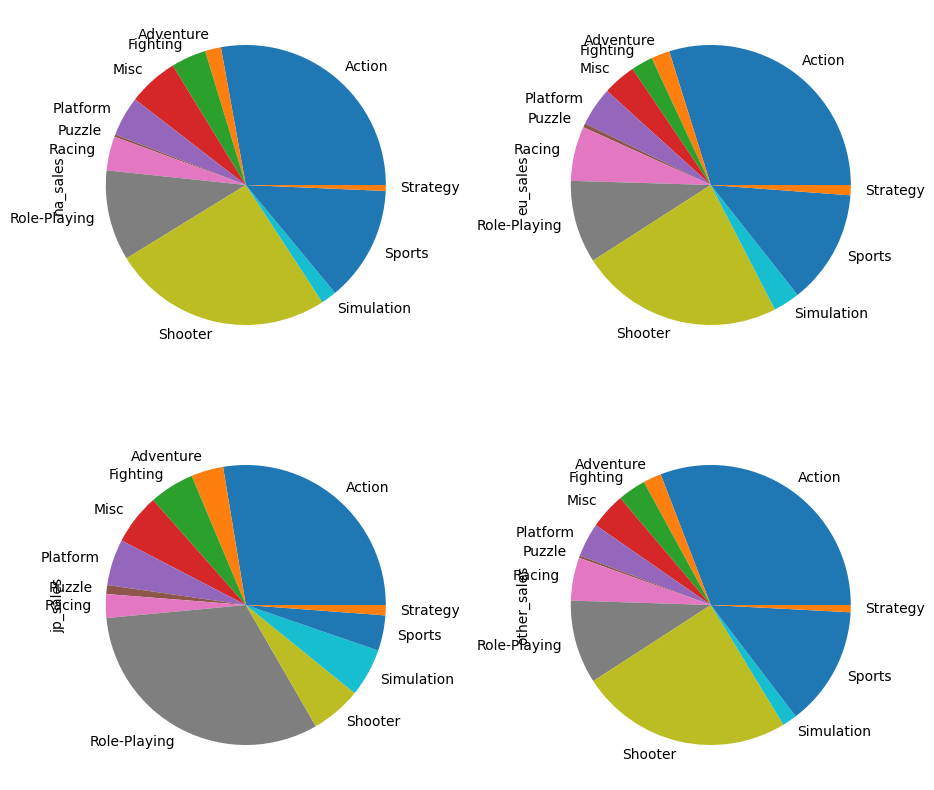

In [64]:
fig, axes = plt.subplots(figsize=(11,10),nrows=2, ncols=2)

df1.plot.pie(subplots=True, ax=axes, legend=False)

plt.show()

Пользователей можно разделить на 2 группы:
- Япония;
- Остальные страны.

Ключевые отличия -- Япония от отстальных:
- Страсть к ролевым играм;
- Нелюбовь к стрелялкам и спорту; 

Ничего не поделать -- ментальность :)

**Топ-5 жанров по регионам**

In [65]:
top_5 = pd.DataFrame(index = range(1,6),columns = ['NA', 'EU', 'JP', 'Others'])
top_5.index.name = 'top_sales'

In [66]:
for i in range(4):
    top_5.iloc[:,i] = list(df1.iloc[:,i].nlargest(5).index)

top_5.iloc[:,[0,1,3,2]]

,NA,EU,Others,JP
top_sales,,,,
1,Action,Action,Action,Role-Playing
2,Shooter,Shooter,Shooter,Action
3,Sports,Sports,Sports,Misc
4,Role-Playing,Role-Playing,Role-Playing,Shooter
5,Misc,Racing,Racing,Simulation


### Самые популярные платформы (топ-5)

In [67]:
# Группировка по платформам
df2 = data.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales']].sum()

# Нормализация
df2 = df2.div(df2.sum())
df2

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,0.108747,0.097401,0.492005,0.067251
PC,0.039315,0.090136,0.000000,0.056254
PS3,0.221389,0.259280,0.241504,0.328502
PS4,0.143075,0.224291,0.078040,0.245033
PSV,0.016407,0.020777,0.106792,0.032587
WiiU,0.050130,0.039949,0.063615,0.030154
X360,0.298413,0.186154,0.016381,0.167900
XOne,0.122523,0.082013,0.001663,0.072319


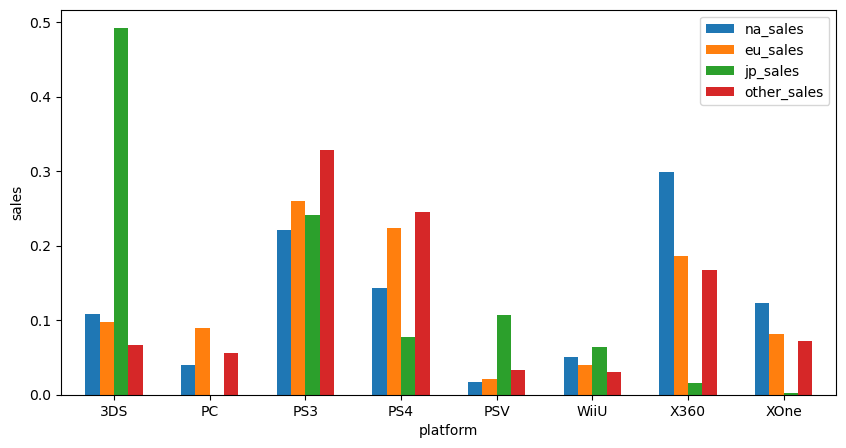

In [68]:
# Столбчатый график с нормализованными данными
df2.plot.bar(figsize = (10,5), width=0.6, rot=0)
plt.ylabel('sales')
plt.show()

**Топ-5 платформ по регионам**

In [69]:
top_51 = pd.DataFrame(index = range(1,6),columns = ['NA', 'EU', 'JP', 'Others'])
top_51.index.name = 'top_sales'

In [70]:
for i in range(4):
    top_51.iloc[:,i] = list(df2.iloc[:,i].nlargest(5).index)

top_51.iloc[:,[0,1,3,2]]

,NA,EU,Others,JP
top_sales,,,,
1,X360,PS3,PS3,3DS
2,PS3,PS4,PS4,PS3
3,PS4,X360,X360,PSV
4,XOne,3DS,XOne,PS4
5,3DS,PC,3DS,WiiU


Здесь видно разделение по всем 4-м группам:

Но Япония снова особняком.
Платформа 3DC, которая в остальных группах на последнем месте, в Японии на 1-м. 

### Рейтинг ESRB vs продажи в регионе

In [71]:
# Рейтинги в базе данных
data.rating.sort_values().unique()

array(['E', 'E10+', 'M', 'RP', 'T', 'n/a'], dtype=object)

In [72]:
# Рейтинг с сортировкой от детского к взрослому контенту

pd.DataFrame({'Age': ['Everyone', '10 and over', '13 and over', '17 and over','Rating missing', 'Rating Pending']},
            index=['E', 'E10+', 'T', 'M', 'n/a','RP'])

,Age
E,Everyone
E10+,10 and over
T,13 and over
M,17 and over
n/a,Rating missing
RP,Rating Pending


https://www.xbox.com  
RP (Rating Pending) have been submitted to the ESRB and are awaiting final rating. This symbol appears only in advertising prior to a game's release.
---
т.е. RP можно не рассматривать

In [73]:
# группировка данных по рейтингу
df3 = data.groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
# меняю порядок строк в соответствии с таблицей рейтингов выше
df3 = df3.reindex(['E', 'E10+', 'T', 'M', 'n/a','RP'])
df3

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,152.52,133.01,33.50,38.24
E10+,83.47,57.88,8.89,18.28
T,103.46,80.45,31.86,27.27
M,307.90,250.06,26.10,81.88
n/a,112.67,107.62,104.16,31.64
RP,0.00,0.03,0.00,0.01


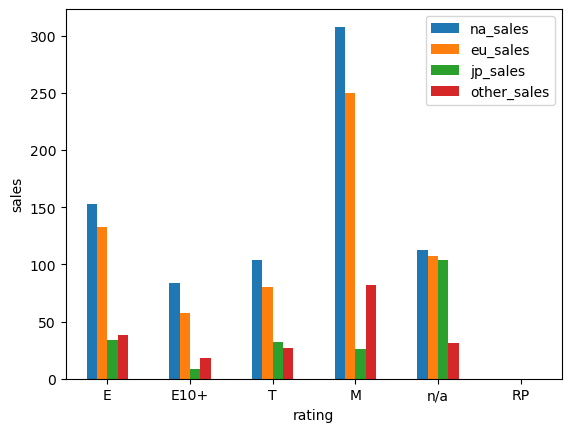

In [74]:
df3.plot.bar(rot=0)
plt.ylabel('sales')
plt.show()

**Регионы NA, EU, Others**  
Игры для самых взрослых "M" - наибольшие продажи. Взрослые любят взрослый контент.  
Продаж в этой категории добавляют и тинейджеры, играющие во "взрослые" игры.  
2-я по популярности - категория "E" - игры для всех возрастов.  
Берёт своей самой большой аудиторией.  ~~

**Регион JP**  
Более миролюбивые игроки.  
В топе - детские игры и игры для тинейджеров.

Большая часть программ без рейтинга приходится на Японский рынок.

Выясняю причину.

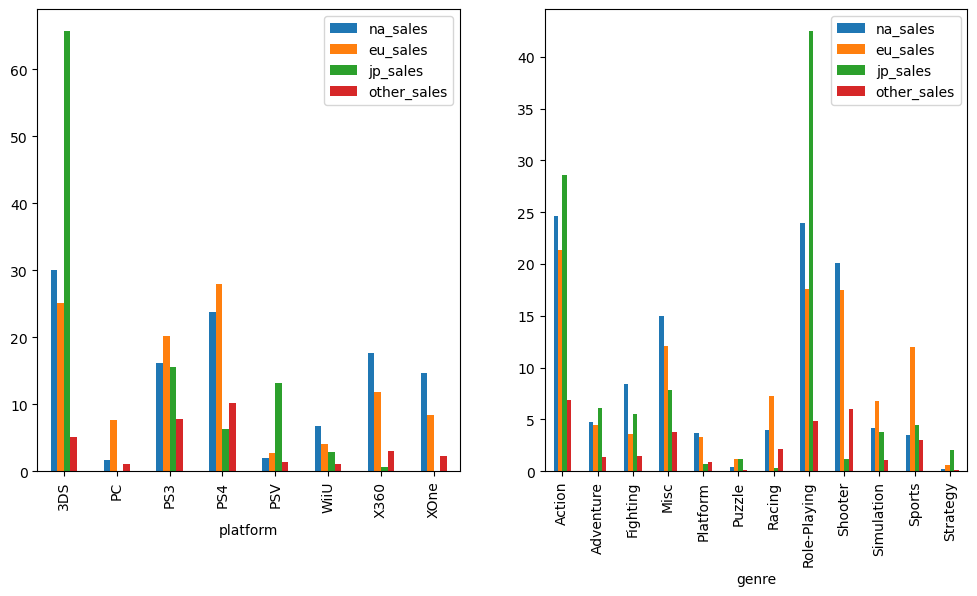

In [83]:
# Строю распределение программ без рейтинга по платформам и жанрам.

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

data.query('rating == "n/a"').groupby('platform').sum(numeric_only=True).iloc[:,[1,2,3,4]].plot.bar(ax= ax1)
data.query('rating == "n/a"').groupby('genre').sum(numeric_only=True).iloc[:,[1,2,3,4]].plot.bar(ax= ax2)
plt.show()

Т.е. основная часть программ без рейтинга приходится на платформу 3DC, популярную в Японии и не популярную в других регионах.

## Проверка Гипотез

### Гипотеза 1

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Считаю, что генеральные совокупности - независимые.

Формулирую нулевую гипотезу:

*H0 = ген.совокупности имеют одинаковое среднее.*

Принимаю alpha = 5 %

Проверяю двустороннюю гипотезу

In [78]:
XOne_sample = data.query('platform == "XOne" and ~user_score.isna()').user_score
PC_sample = data.query('platform == "PC" and ~user_score.isna()').user_score

# Размер выборок

len(XOne_sample), len(PC_sample)

(182, 307)

In [79]:
# Выборки неодинаковые по размеру, поэтому equal_var=False

st.ttest_ind (XOne_sample, PC_sample, equal_var=False)

Ttest_indResult(statistic=0.5060666492177487, pvalue=0.6130712247638477)

**Результат:**

p-value (0.96) >> alpha (0.05)  
Н0 не отвергнута.  
Средние рейтинги платформ одинаковые.


### Гипотеза 2

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Считаю, что генеральные совокупности - независимые.

Формулирую нулевую гипотезу:

*H0 = ген.совокупности имеют одинаковое среднее.*

Принимаю alpha = 5 %

Проверяю двустороннюю гипотезу

In [80]:
action_sample = data.query('genre == "Action" and ~user_score.isna()').user_score
sports_sample = data.query('genre == "Sports" and ~user_score.isna()').user_score

# Размер выборок

len(action_sample), len(sports_sample)

(634, 231)

In [81]:
# Выборки сильно неодинаковые по размеру, поэтому equal_var=False

st.ttest_ind (action_sample, sports_sample, equal_var=False)

Ttest_indResult(statistic=9.529913781044852, pvalue=3.282930541405523e-19)

**Результат:**

p-value (3e-17) << alpha (0.05)  
Н0 отвергнута.  
Средние рейтинги жанров НЕ одинаковые.


## Общий вывод

- Потенциально прибыльные платформы - PS4, XOne
- Экшн и Стрелялки - самые популярные жанры.
- Нет корреляции между продажами и отзывами пользователей. 
- Слабая положительная корреляция с оценками критиков.
- Игры для самой взрослой аудитории - самые популярные. Второе место - игры для всех возрастов.
- Поведение Японского пользователя отличается от остальных регионов и по жанрам и по платформам.

**Добавил:**

- Распределения продаж по всем платформам имеют сильную положительную скошенность. Медиана < Среднего. Оценку прибыльности лучше проводить по медианному значению.
- Резкое нарастание кол-ва выпускаемых игр с 1-й половины 90-х до средины 2000-х.
- Срок жизни платформы порядка 7 лет.
- Большое количество пропусков в рейтинге приходится на Японию и связано с популярной там платформой 3DS.

